In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
 

/kaggle/input/co2-emission-by-vehicles/CO2 Emissions_Canada.csv
/kaggle/input/co2-emission-by-vehicles/Data Description.csv


# Reading the data

In [ ]:
data = pd.read_csv("../input/co2-emission-by-vehicles/CO2 Emissions_Canada.csv")
data.head(10)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


In [ ]:
data.shape

(7385, 12)

In [ ]:
data.nunique()

Make                                  42
Model                               2053
Vehicle Class                         16
Engine Size(L)                        51
Cylinders                              8
Transmission                          27
Fuel Type                              5
Fuel Consumption City (L/100 km)     211
Fuel Consumption Hwy (L/100 km)      143
Fuel Consumption Comb (L/100 km)     181
Fuel Consumption Comb (mpg)           54
CO2 Emissions(g/km)                  331
dtype: int64

In [ ]:
data.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [ ]:
data.duplicated().sum()

1103

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data["Fuel Type"].unique()

array(['Z', 'D', 'X', 'E', 'N'], dtype=object)

In [ ]:
data["Transmission"].unique()

array(['AS5', 'M6', 'AV7', 'AS6', 'AM6', 'A6', 'AM7', 'AV8', 'AS8', 'A7',
       'A8', 'M7', 'A4', 'M5', 'AV', 'A5', 'AS7', 'A9', 'AS9', 'AV6',
       'AS4', 'AM5', 'AM8', 'AM9', 'AS10', 'A10', 'AV10'], dtype=object)

In [ ]:
data["Vehicle Class"].unique()

array(['COMPACT', 'SUV - SMALL', 'MID-SIZE', 'TWO-SEATER', 'MINICOMPACT',
       'SUBCOMPACT', 'FULL-SIZE', 'STATION WAGON - SMALL',
       'SUV - STANDARD', 'VAN - CARGO', 'VAN - PASSENGER',
       'PICKUP TRUCK - STANDARD', 'MINIVAN', 'SPECIAL PURPOSE VEHICLE',
       'STATION WAGON - MID-SIZE', 'PICKUP TRUCK - SMALL'], dtype=object)

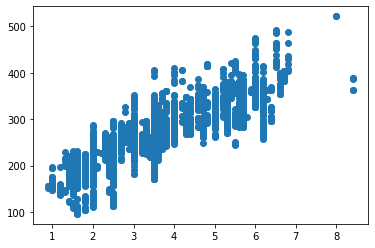

In [ ]:
plt.scatter(data["Engine Size(L)"], data["CO2 Emissions(g/km)"])

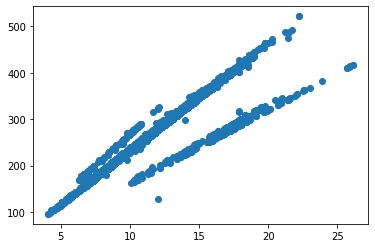

In [ ]:
plt.scatter(data["Fuel Consumption Comb (L/100 km)"], data["CO2 Emissions(g/km)"])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Cylinders', ylabel='CO2 Emissions(g/km)'>

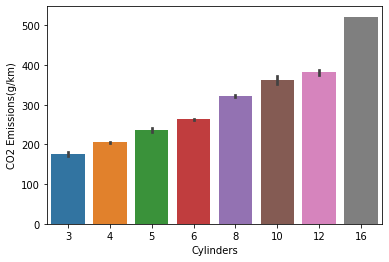

In [ ]:
sns.barplot(data["Cylinders"],data["CO2 Emissions(g/km)"])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Fuel Type', ylabel='CO2 Emissions(g/km)'>

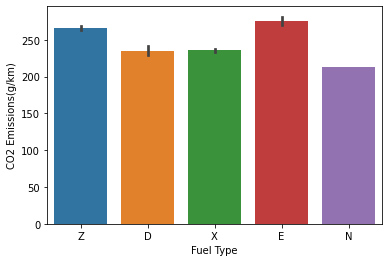

In [ ]:
sns.barplot(data["Fuel Type"],data["CO2 Emissions(g/km)"])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='CO2 Emissions(g/km)', ylabel='Vehicle Class'>

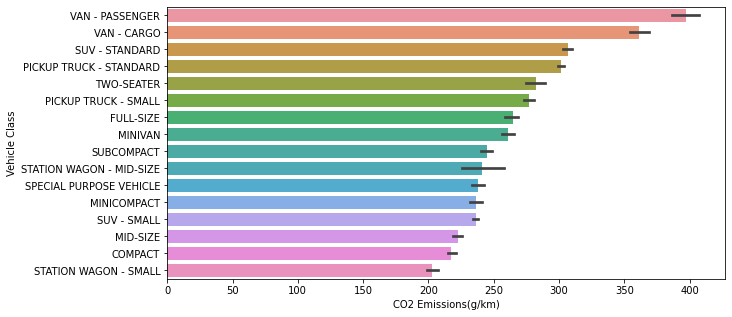

In [ ]:
plt.figure(figsize=(10,5))
order =data.groupby(['Vehicle Class']).mean().sort_values('CO2 Emissions(g/km)',ascending=False).index
sns.barplot(data["CO2 Emissions(g/km)"],data["Vehicle Class"],order=order)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='CO2 Emissions(g/km)', ylabel='Transmission'>

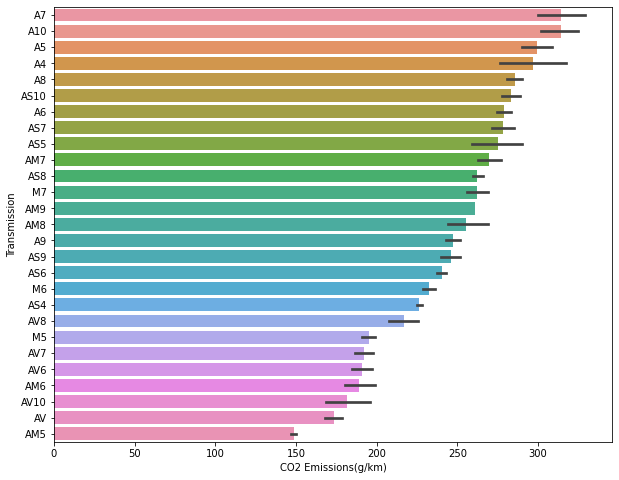

In [ ]:
plt.figure(figsize = (10,8))
order = data.groupby(["Transmission"]).mean().sort_values("CO2 Emissions(g/km)", ascending = False).index
sns.barplot(data["CO2 Emissions(g/km)"],data["Transmission"],order = order)

In [ ]:
X = data[["Vehicle Class","Transmission","Fuel Type","Engine Size(L)","Cylinders","Fuel Consumption Comb (L/100 km)"]]
Y = data[["CO2 Emissions(g/km)"]]
X.head(10)

,Vehicle Class,Transmission,Fuel Type,Engine Size(L),Cylinders,Fuel Consumption Comb (L/100 km)
0,COMPACT,AS5,Z,2.0,4,8.5
1,COMPACT,M6,Z,2.4,4,9.6
2,COMPACT,AV7,Z,1.5,4,5.9
3,SUV - SMALL,AS6,Z,3.5,6,11.1
4,SUV - SMALL,AS6,Z,3.5,6,10.6
5,MID-SIZE,AS6,Z,3.5,6,10.0
6,MID-SIZE,AS6,Z,3.5,6,10.1
7,MID-SIZE,AS6,Z,3.7,6,11.1
8,MID-SIZE,M6,Z,3.7,6,11.6
9,COMPACT,AS5,Z,2.4,4,9.2


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
cols = ["Engine Size(L)","Cylinders","Fuel Consumption Comb (L/100 km)"]
X[cols] = sc.fit_transform(X[cols])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
oc = OrdinalEncoder()
cols = ["Vehicle Class","Transmission","Fuel Type"]
X[cols] = oc.fit_transform(X[cols])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [ ]:
X.head(10)

,Vehicle Class,Transmission,Fuel Type,Engine Size(L),Cylinders,Fuel Consumption Comb (L/100 km)
0,0.0,14.0,4.0,-0.851086,-0.876934,-0.854490
1,0.0,25.0,4.0,-0.558066,-0.876934,-0.481184
2,0.0,22.0,4.0,-1.217362,-0.876934,-1.736851
3,11.0,15.0,4.0,0.247740,0.206429,0.027870
4,11.0,15.0,4.0,0.247740,0.206429,-0.141815
5,2.0,15.0,4.0,0.247740,0.206429,-0.345436
6,2.0,15.0,4.0,0.247740,0.206429,-0.311499
7,2.0,15.0,4.0,0.394251,0.206429,0.027870
8,2.0,25.0,4.0,0.394251,0.206429,0.197555
9,0.0,14.0,4.0,-0.558066,-0.876934,-0.616932


In [ ]:
# Splitting the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 14)

# Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test)

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train_poly,y_train)

LinearRegression()

In [ ]:
reg.score(x_train_poly,y_train)

0.9780428330316173

In [ ]:
reg.score(x_test_poly,y_test)

0.9794464379667018

# Decision Tree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(random_state = 5, max_depth = 5)
dt_reg.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=5, random_state=5)

In [ ]:
dt_reg.score(x_train,y_train)

0.9835169463357659

In [ ]:
dt_reg.score(x_test,y_test)

0.9785721631327842

# Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators = 3, random_state = 0)
rf_reg.fit(x_train, y_train)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(n_estimators=3, random_state=0)

In [ ]:
rf_reg.score(x_train,y_train)

0.9980971358116845

In [ ]:
rf_reg.score(x_test,y_test)

0.9958800608857328